<img src = Images/diabetes.jpg width = '2000' height = '3700' >

# Diabetes - Business Problem
---

Diabetes is a chronic long-lasting health condition that affects how your body turns food into energy. Your body breaks down most of the food you eat into sugar (glucose) and releases it into your bloodstream. When your blood sugar goes up, it signals your pancreas to release insulin. Diabetes often leads to cardiovascular disease, stroke, kidney damage, and long-term damage to the extremities such as the limbs and eyes.

In this project, we will use machine learning algorithms to address the issue of diabetes. We will use the labeled vital measurements of the patients for example, "Age and Blood Insulin Level" from data then train them using machine learning neural networks to make predictions on new patients.

## The Diabetes Dataset

The dataset that will be used in this project is obtained from the Pima Indians Diebetes dataset, as provided by the National Institute of Diabtes, Digestive, and Kidney Diseases and hosted by Kaggle.

In [1]:
!ls Data

diabetes.csv


In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from tensorflow.keras import Sequential

from keras.layers import Dense

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

## Exploritory Data Analysis ( EDA )

In [3]:
df = pd.read_csv('Data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.shape

(768, 9)

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The measurement for Glucose, BloodPressure, SkinThickness, Insulin, and BMI should never be 0... However, based on the above data description. It's showing that minimum values for those variables are 0. these here tells me that we might have some missing data, or there was a problem with the data during the collection.

In [8]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

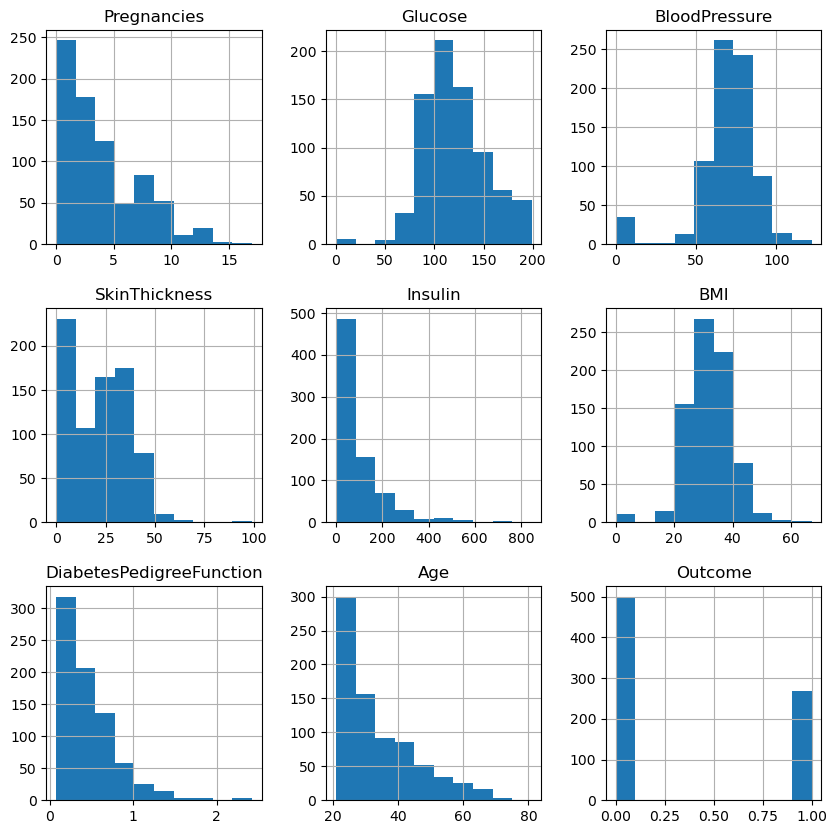

In [9]:
df.hist(figsize = (10, 10))
plt.show()

- As showing in our Age histogram above, the data was collected from young people between the age of 20 - 30 years old.
- The distribution of BMI and BloodPressure are normally distributed.
- We have people with almost 200 glucose plasma concentration and on the opposite side we have people with 0 values for BMI, BloodPressure, and Glucose. Logically, it's not possible to have a 0 value for these measurements, and it might indicate that we have some missing values.
- On the pregnancies histogram we can see the previous pregnacies are about 15 it's not impossible but it indicates that there's an outlier.
- DiabetesPedigreeFunction and Insullin variables ranges from 0 - 2.5 and 0 - 800. These indicates that our variables are on a different scales, which can cause a problem sometimes when training our data in neural networks since variables with larger scales tend to dominate variable with smaller scales.

/var/folders/ny/y4smplb93zn6dl4f36sqhd9h0000gn/T/ipykernel_94487/2966413283.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df.Outcome == 0][col], hist = False, axlabel = False,
/var/folders/ny/y4smplb93zn6dl4f36sqhd9h0000gn/T/ipykernel_94487/2966413283.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147e

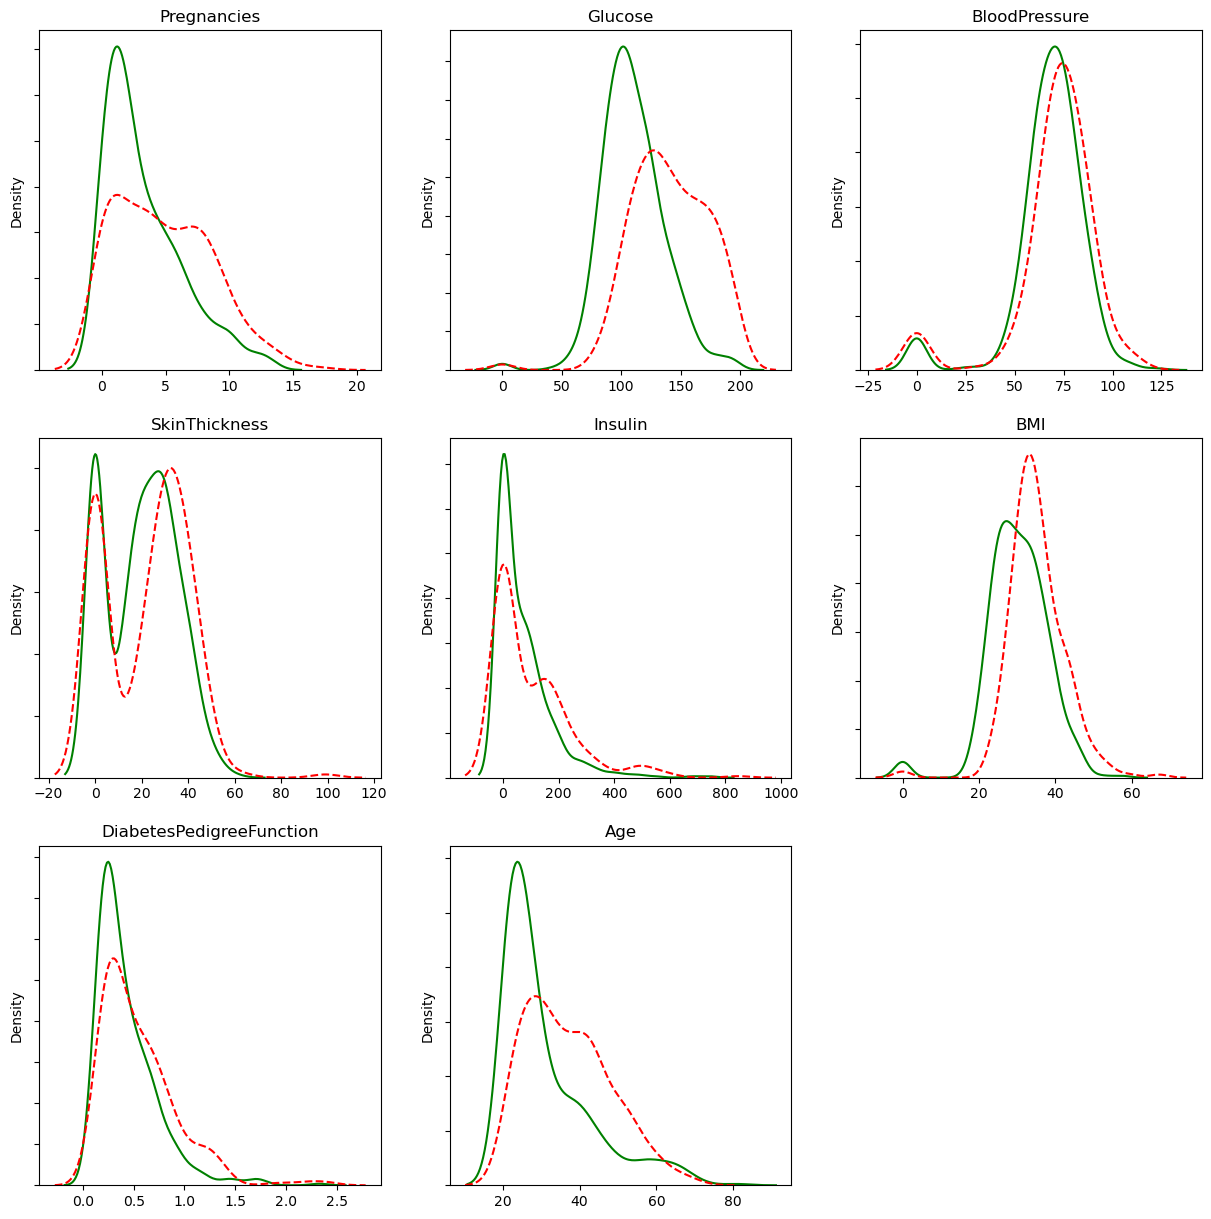

In [10]:
#Plot a density to show the relationship between each variable.

plt.subplots(3, 3, figsize = (15, 15))

# Plot a density plot for each variable.
for idx, col in enumerate(df.columns):
    ax = plt.subplot(3, 3, idx + 1)
    ax.yaxis.set_ticklabels([])
    
    sns.distplot(df.loc[df.Outcome == 0][col], hist = False, axlabel = False, 
    kde_kws = {'linestyle':'-', 
    'color':'green', 'label':"No Diabetes"})

    
    sns.distplot(df.loc[df.Outcome == 1][col], hist = False, axlabel = False, 
    kde_kws = {'linestyle':'--', 
    'color':'red', 'label':"Diabetes"})
    
    
    ax.set_title(col)
    
    # Hide the 9th subplot (bottom right) since there are only 8 plots
plt.subplot(3, 3, 9).set_visible(False)
#plt.tight_layout()
plt.show()

The preceding density plots look complicated, but let's focus on each individual plot and see what insights can we gain. If we look at the plot for the Glucose variable, we can see that among the non-diabetics (solid line), the curve has a normal distribution centered around the value 100. This tells us that among non-diabetics, most people have a blood glucose value of 100 mg/dL. On the other hand, if we look at the Diabetics (dashed line), the curve is wider and is centered around a value of 150. This tells us that diabetics tends to have a wider range of blood glucose value, and the average blood glucose value is around 150 mg/dL. Therefore, there is a significant difference in blood glucose values for diabetes vs non-diabetics. A similar analysis can also be made for the variable BMI and Age. In other words, the Glucose, BMI, and Age variables are strong predictors for diabetes. People with diabetes tend to have higher blood glucose level, higher BMI, and are older.
On the other hand, we can see that for variables such as BloodPressure and SkinThickness, there is no significant difference in the distribution between diabetics and non-diabetics. The two groups of people tend to have similar blood pressure and skin thickness values. Therefore, BloodPressure and SkinThickness are poorer predictors for diabetes.

## Data Preprocessing

Earlier when we checked the discription of our data, we noticed that some of our data such as BloodPressure, Glucose, SkinThickness, Insulin, and BMI have a minimum measurement values of 0. Which is not correct, let's try and see if we can take care of those 0 or missing values.

#### Dealing With Missing Data

In [11]:
# Checking how many 0 values in each column.

print("The number of rows with 0 values for each variable")
for col in df.columns:
    missing_rows = df.loc[df[col] == 0].shape
    print(col + ": " + str(missing_rows[0]))

The number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


Overall all we have about 768 rows in our data and as showing above: -
- Glucose has 5 rows with 0 values.
- BloodPressure has 35 rows with 0 values.
- SkinThickness has 227 rows with 0 values, which is a quarter or more of our data.
- Insulin has 374 rows with values which is almost a half of our data.
- BMI has 11 rows of 0 values.


This results tells me that am missing a lot of data, and cannot just discard it like that since it will cause a significant drop in our model performance.

There are numerous ways to deal with missing values such as: 
- Remove missing rows that contains the missing values.
- Replace the missing values with the mean, median, or mode.
- We can try to predict the actual missing values using a seperate ML model.

Since the missing values of our variables comes from a continuous variables such as Glucose, BloodPressure, SkinThickness, Insulin, and BMI... We will go ahead and replace the missing values with the mean of the non-missing values.

In [12]:
# Replacing the continuous variables that contains missing values with NaN instead of 0.

df['Glucose'] = df['Glucose'].replace(0, np.NaN)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.NaN)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.NaN)
df['Insulin'] = df['Insulin'].replace(0, np.NaN)
df['BMI'] = df['BMI'].replace(0, np.NaN)

In [13]:
# Checking missing values.
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [14]:
# Replacing NaN values with the mean of non-missing values.

df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

In [15]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Data Standardization

Data standardization is a process of transforming the data to have zero mean and unit variance. This can be useful in certain machine learning algorithms that assume that the data is normally distributed or that the scale of the variables is similar.

In [16]:
# Create a StandardScaler variable.
scaler = StandardScaler()

# Fit the scaler to the data.
scaler.fit(df)

# Transform the data using the scaler.
X_scaled = scaler.transform(df)

In [17]:
# Converting our variables back to pandas since it was change during the pre-processing
X_scaled = pd.DataFrame(X_scaled, columns = df.columns)

# We will be using the original outcome (Target) of our data since we don't wanna scale it.
X_scaled['Outcome'] = df['Outcome']
df = X_scaled

# The data is now standardized, with zero mean and unit variance
print(df.describe().loc[['mean', 'std', 'max'],].round(2).abs())

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
mean         0.00     0.00            0.0           0.00     0.00  0.00   
std          1.00     1.00            1.0           1.00     1.00  1.00   
max          3.91     2.54            4.1           7.95     8.13  5.04   

      DiabetesPedigreeFunction   Age  Outcome  
mean                      0.00  0.00     0.35  
std                       1.00  1.00     0.48  
max                       5.88  4.06     1.00  


#### Train-Test & Validate

This is the final step of our data preprocessing... The purpose of training, testing, and validating is to help avoid overfitting and provide an unbiased source of data for evaluating our model performance. 

In [18]:
# Splitting the data into 80% training and 20% testing. Then 80% training and %20 validating.

# Before splitting the data we first need to identify our targets by separting our data into two X 
# (Input Features)& Y(Target)

X = df.drop('Outcome', axis = 1)
y = df['Outcome']

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2)

## Project Model

In [21]:
model = Sequential()

In [24]:
# Let's add the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 8))

In [25]:
# Add the second hidden layer
model.add(Dense(16, activation = 'relu'))

In [27]:
# Finally we add the output layer for the MLP (Multilayer preception)
model.add(Dense(1, activation = 'sigmoid'))